In [1]:
import numpy as np
import tensorflow as tf
import time

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
mnist.train.images[0:10].reshape(10,28,28).shape

(10, 28, 28)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

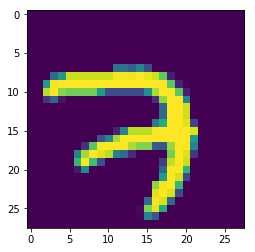

In [4]:
plt.imshow(mnist.train.images[0:10].reshape(10,28,28)[0])
plt.show()

In [5]:
logs_path = '/tmp/tensorflow_logs/datagiri_tf2'

In [6]:
# Parameters
learning_rate = 0.01
epochs = 30
batch_size = 32

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(tf.zeros([784, 10]), name = "Weights")
b = tf.Variable(tf.zeros([10]), name = "Bias")

# Construct model
pred = tf.matmul(x, W) + b # Softmax
# image = tf.reshape(x,[32,28,28])
# tf.summary.image("input_image", image)

# Minimize error using cross entropy
with tf.name_scope("cost"):
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=pred, labels=y))
# Gradient Descent
with tf.name_scope("optimizer"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

with tf.name_scope("accuracy"):
    with tf.name_scope("prediction"):
        prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y,1))
    with tf.name_scope("accuracy"):
        accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))
tf.summary.scalar("accuracy", accuracy)

# Initializing the variables
init = tf.global_variables_initializer()

# Create a summary to monitor cost tensor
tf.summary.scalar("loss", cost)
merged_summary_op = tf.summary.merge_all()


In [7]:
start = time.time()
with tf.Session() as sess:
    sess.run(init)
    summary_writer = tf.summary.FileWriter(logs_path, graph = sess.graph)
    for i in range(epochs):
        batches = int(len(mnist.train.images)/batch_size)
        for j in range(batches):
            _, summary = sess.run([optimizer, merged_summary_op], feed_dict={x: mnist.train.images[j*batch_size:(j+1)*batch_size,:],y: mnist.train.labels[j*batch_size:(j+1)*batch_size,:]})
            summary_writer.add_summary(summary, epochs*batches+i)
            if j % 500 == 0:
                train_acc = sess.run([accuracy], feed_dict={x: mnist.train.images, y: mnist.train.labels})
                valid_acc = sess.run([accuracy], feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
                print ("epoch: ", i , "Train_Accuracy: ", train_acc, "Validation_Accuracy: ", valid_acc, "time_taken:", (time.time() - start))
    print ("total time taken: ", time.time()-start)
    test_accuracy = sess.run([accuracy],feed_dict={x: mnist.test.images, y: mnist.test.labels} )
    print("Test Accuracy:", test_accuracy)

epoch:  0 Train_Accuracy:  [0.38676363] Validation_Accuracy:  [0.38240001] time_taken: 0.5598840713500977
epoch:  0 Train_Accuracy:  [0.73125452] Validation_Accuracy:  [0.7392] time_taken: 1.2578229904174805
epoch:  0 Train_Accuracy:  [0.7744] Validation_Accuracy:  [0.7816] time_taken: 1.9547700881958008
epoch:  0 Train_Accuracy:  [0.78685457] Validation_Accuracy:  [0.79460001] time_taken: 2.6508970260620117
epoch:  1 Train_Accuracy:  [0.79187274] Validation_Accuracy:  [0.801] time_taken: 3.071408987045288
epoch:  1 Train_Accuracy:  [0.7990182] Validation_Accuracy:  [0.80500001] time_taken: 3.766202926635742
epoch:  1 Train_Accuracy:  [0.81227273] Validation_Accuracy:  [0.81819999] time_taken: 4.464632987976074
epoch:  1 Train_Accuracy:  [0.81618184] Validation_Accuracy:  [0.82459998] time_taken: 5.16135311126709
epoch:  2 Train_Accuracy:  [0.81767273] Validation_Accuracy:  [0.82560003] time_taken: 5.587445020675659
epoch:  2 Train_Accuracy:  [0.81994545] Validation_Accuracy:  [0.82700

In [ ]:
! tensorboard --logdir=/tmp/tensorflow_logs
# run the above command to visualize the graph and other losses defined 